In [1]:
import numpy as np 
import pandas as pd 
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import tools
import plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
#Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

xAPI-Edu-Data



/kaggle/input/xAPI-Edu-Data/xAPI-Edu-Data.csv


In [2]:
# Reading the data
student = pd.read_csv('/kaggle/input/xAPI-Edu-Data/xAPI-Edu-Data.csv')

In [3]:
# Checking the head of the data (First 5 rows)
student.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
# Show null counts and data types
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

Data set Describe****

In [5]:
student.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [6]:
print(student.shape)

(480, 17)


In [7]:
student.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [8]:
student['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

Percentage M    0.635417
F    0.364583
Name: gender, dtype: float64


<AxesSubplot:>

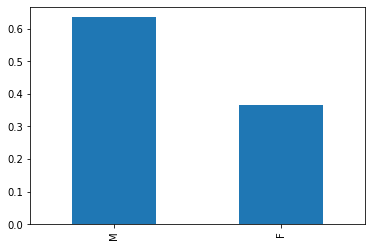

In [9]:
print('Percentage',student.gender.value_counts(normalize=True))
student.gender.value_counts(normalize=True).plot(kind='bar')

In [10]:
student['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

Percentage KW             0.372917
Jordan         0.358333
Palestine      0.058333
Iraq           0.045833
lebanon        0.035417
Tunis          0.025000
SaudiArabia    0.022917
Egypt          0.018750
Syria          0.014583
USA            0.012500
Iran           0.012500
Lybia          0.012500
Morocco        0.008333
venzuela       0.002083
Name: NationalITy, dtype: float64


<AxesSubplot:>

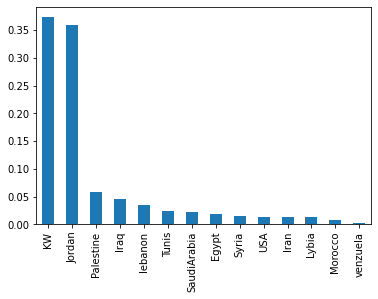

In [11]:
print('Percentage',student.NationalITy.value_counts(normalize=True))
student.NationalITy.value_counts(normalize=True).plot(kind='bar')

In [12]:
student['PlaceofBirth'].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

Percentage KuwaIT         0.375000
Jordan         0.366667
Iraq           0.045833
lebanon        0.039583
SaudiArabia    0.033333
USA            0.033333
Palestine      0.020833
Egypt          0.018750
Tunis          0.018750
Iran           0.012500
Syria          0.012500
Lybia          0.012500
Morocco        0.008333
venzuela       0.002083
Name: PlaceofBirth, dtype: float64


<AxesSubplot:>

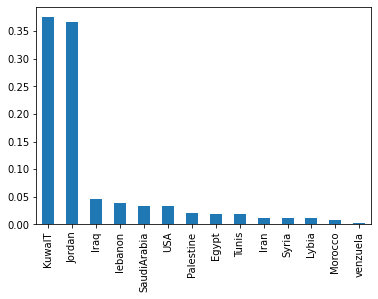

In [13]:
print('Percentage',student.PlaceofBirth.value_counts(normalize=True))
student.PlaceofBirth.value_counts(normalize=True).plot(kind='bar')

In [14]:
student['Topic'].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

Percentage IT           0.197917
French       0.135417
Arabic       0.122917
Science      0.106250
English      0.093750
Biology      0.062500
Spanish      0.052083
Chemistry    0.050000
Geology      0.050000
Quran        0.045833
Math         0.043750
History      0.039583
Name: Topic, dtype: float64


<AxesSubplot:>

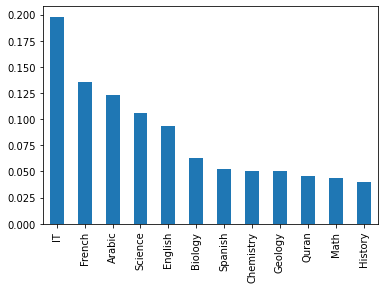

In [15]:
print('Percentage',student.Topic.value_counts(normalize=True))
student.Topic.value_counts(normalize=True).plot(kind='bar')

In [16]:
student['StageID'].value_counts()

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

Percentage MiddleSchool    0.516667
lowerlevel      0.414583
HighSchool      0.068750
Name: StageID, dtype: float64


<AxesSubplot:>

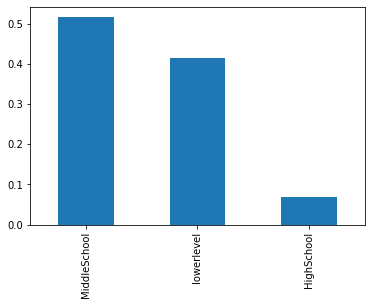

In [17]:
print('Percentage',student.StageID.value_counts(normalize=True))
student.StageID.value_counts(normalize=True).plot(kind='bar')

In [18]:
student['GradeID'].value_counts()

G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64

Percentage G-02    0.306250
G-08    0.241667
G-07    0.210417
G-04    0.100000
G-06    0.066667
G-11    0.027083
G-12    0.022917
G-09    0.010417
G-10    0.008333
G-05    0.006250
Name: GradeID, dtype: float64


<AxesSubplot:>

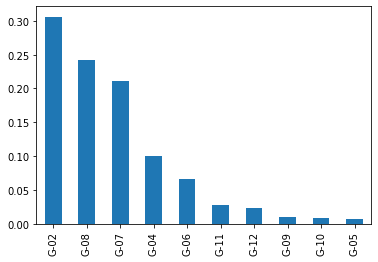

In [19]:
print('Percentage',student.GradeID.value_counts(normalize=True))
student.GradeID.value_counts(normalize=True).plot(kind='bar')

In [20]:
student['Semester'].value_counts()

F    245
S    235
Name: Semester, dtype: int64

Parcentage F    0.510417
S    0.489583
Name: Semester, dtype: float64


<AxesSubplot:>

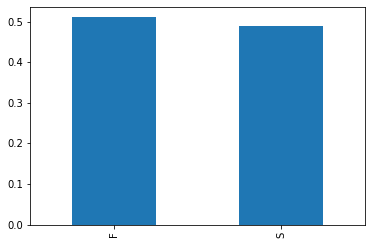

In [21]:
print('Parcentage',student.Semester.value_counts(normalize=True))
student.Semester.value_counts(normalize=True).plot(kind='bar')

In [22]:
student['Relation'].value_counts()

Father    283
Mum       197
Name: Relation, dtype: int64

Parcentage Father    0.589583
Mum       0.410417
Name: Relation, dtype: float64


<AxesSubplot:>

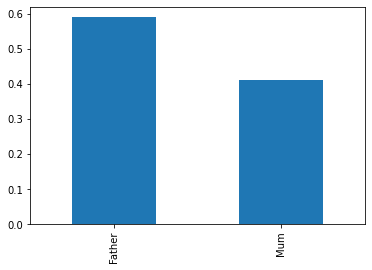

In [23]:
print('Parcentage',student.Relation.value_counts(normalize=True))
student.Relation.value_counts(normalize=True).plot(kind='bar')

In [24]:
student['raisedhands'].value_counts()

10    31
70    31
80    28
72    17
50    17
      ..
61     1
83     1
52     1
67     1
97     1
Name: raisedhands, Length: 82, dtype: int64

In [25]:
#print('Parcentage',df.raisedhands.value_counts(normalize=True))
#df.raisedhands.value_counts(normalize=True).plot(kind='bar')
color_brewer = ['#41B5A3','#FFAF87','#FF8E72','#ED6A5E','#377771','#E89005','#C6000D','#000000','#05668D','#028090','#9FD35C',
                '#02C39A','#F0F3BD','#41B5A3','#FF6F59','#254441','#B2B09B','#EF3054','#9D9CE8','#0F4777','#5F67DD','#235077','#CCE4F9','#1748D1',
                '#8BB3D6','#467196','#F2C4A2','#F2B1A4','#C42746','#330C25']
fig = {
  "data": [
    {
      "values": student["raisedhands"].value_counts().values,
      "labels": student["raisedhands"].value_counts().index,
      "domain": {"x": [0, .95]},
      "name": "Raisedhands Parcentage",
      "hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie",
      "marker": {"colors": [i for i in reversed(color_brewer)]},
      "textfont": {"color": "#FFFFFF"}
    }],
  "layout": {
        "title":"Raisedhands Parcentage",
        "annotations": [
            {
                "font": {
                    "size": 15
                },
                "showarrow": False,
                "text": "Raisedhands Parcentage",
                "x": 0.4,
                "y": 0.5
            }
        ]
    }
}
iplot(fig, filename='donut')

In [26]:
student['ParentschoolSatisfaction'].value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

Parcentage Good    0.608333
Bad     0.391667
Name: ParentschoolSatisfaction, dtype: float64


<AxesSubplot:>

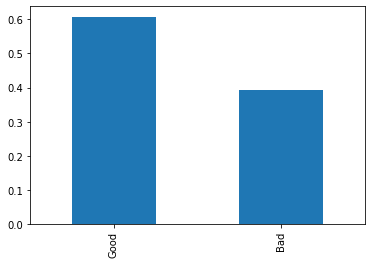

In [27]:
print('Parcentage',student.ParentschoolSatisfaction.value_counts(normalize=True))
student.ParentschoolSatisfaction.value_counts(normalize=True).plot(kind='bar')

In [28]:
student['ParentAnsweringSurvey'].value_counts()

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64

Parcentage Yes    0.5625
No     0.4375
Name: ParentAnsweringSurvey, dtype: float64


<AxesSubplot:>

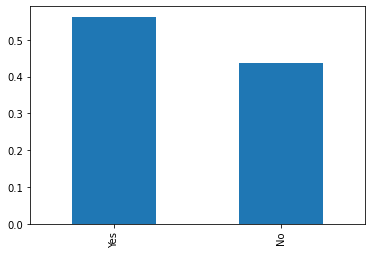

In [29]:
print('Parcentage',student.ParentAnsweringSurvey.value_counts(normalize=True))
student.ParentAnsweringSurvey.value_counts(normalize=True).plot(kind='bar')

In [30]:
student['StudentAbsenceDays'].value_counts()

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64

Parcentage Under-7    0.602083
Above-7    0.397917
Name: StudentAbsenceDays, dtype: float64


<AxesSubplot:>

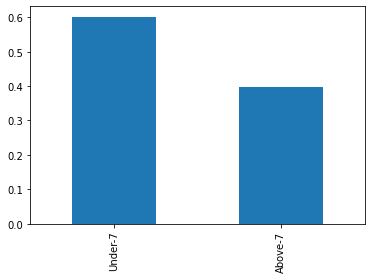

In [31]:
print('Parcentage',student.StudentAbsenceDays.value_counts(normalize=True))
student.StudentAbsenceDays.value_counts(normalize=True).plot(kind='bar')

In [32]:
student['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

Parcentage M    0.439583
H    0.295833
L    0.264583
Name: Class, dtype: float64


<AxesSubplot:>

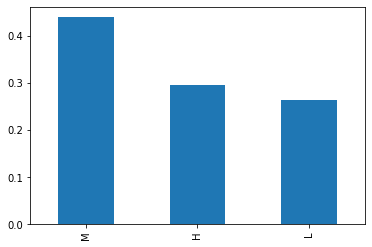

In [33]:
print('Parcentage',student.Class.value_counts(normalize=True))
student.Class.value_counts(normalize=True).plot(kind='bar')

# Exploring the data

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Class', ylabel='count'>

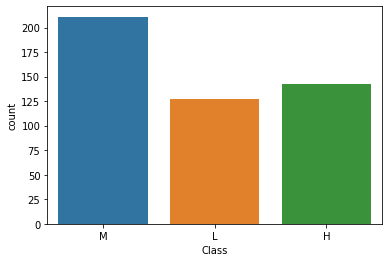

In [34]:
# Count of students of each class
sns.countplot(student['Class'])

<AxesSubplot:xlabel='Class', ylabel='count'>

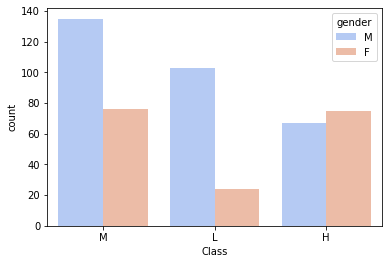

In [35]:
# Student class by gender
sns.countplot(x='Class',hue='gender',data=student,palette='coolwarm')

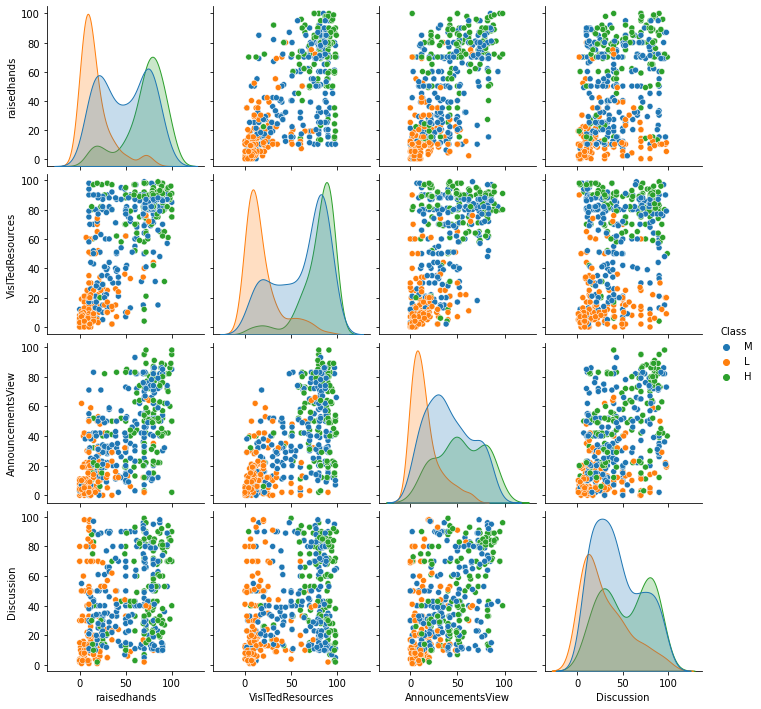

In [36]:
# Countplot based on the student Class
sns.pairplot(student,hue='Class')

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

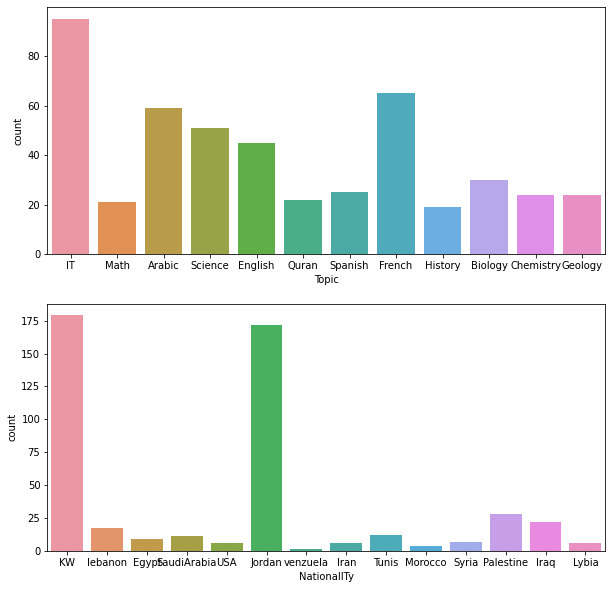

In [37]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', data=student, ax=axis1)
sns.countplot(x='NationalITy', data=student, ax=axis2)

# Feature Engineering

In [38]:
# Replacing categorical values to numerical

student['gender'].replace('M', 0,inplace=True)
student['gender'].replace('F', 1,inplace=True)

# Or we can use get_dummies to convert categorical values and concatenate them later
nat = pd.get_dummies(student['NationalITy'])
sid = pd.get_dummies(student['StageID'])
gid = pd.get_dummies(student['GradeID'])
secid = pd.get_dummies(student['SectionID'])
topic = pd.get_dummies(student['Topic'])
semester = pd.get_dummies(student['Semester'])
rel = pd.get_dummies(student['Relation'])
pas = pd.get_dummies(student['ParentAnsweringSurvey'])
pss = pd.get_dummies(student['ParentschoolSatisfaction'])
sab = pd.get_dummies(student['StudentAbsenceDays'])

In [39]:
#Drop useless columns & columns we need to replace with variables above
student.drop(['NationalITy','PlaceofBirth','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester',
              'Relation','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays'],axis=1,inplace=True)

In [40]:
# Concatenating the variables we created above 
student = pd.concat([student,nat,sid,gid,secid,topic,semester,rel,pas,pss,sab],axis=1)

# Feature selection

In [41]:
# Check all the columns
student.columns

Index(['gender', 'raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion', 'Class', 'Egypt', 'Iran', 'Iraq', 'Jordan', 'KW', 'Lybia',
       'Morocco', 'Palestine', 'SaudiArabia', 'Syria', 'Tunis', 'USA',
       'lebanon', 'venzuela', 'HighSchool', 'MiddleSchool', 'lowerlevel',
       'G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11',
       'G-12', 'A', 'B', 'C', 'Arabic', 'Biology', 'Chemistry', 'English',
       'French', 'Geology', 'History', 'IT', 'Math', 'Quran', 'Science',
       'Spanish', 'F', 'S', 'Father', 'Mum', 'No', 'Yes', 'Bad', 'Good',
       'Above-7', 'Under-7'],
      dtype='object')

In [42]:
Label = student['Class'] # Class is the value we want to predict

Features = student[['gender', 'raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion','Father', 'Mum', 'No', 'Yes', 'Bad', 'Good',
       'Above-7', 'Under-7']]


# We can also use the following method

#Features = student.drop(['feature a','feature b' .... 'feature n'],axis=1)

# Scaling the data

In [43]:
#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(Features)
scaled = scaler.transform(Features)

# Train Test Split

In [44]:
X = scaled
y = Label
# split the data to 20% test,80% train with random state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Training Models

# Random Forest Classifier

### Finding best number of estimators

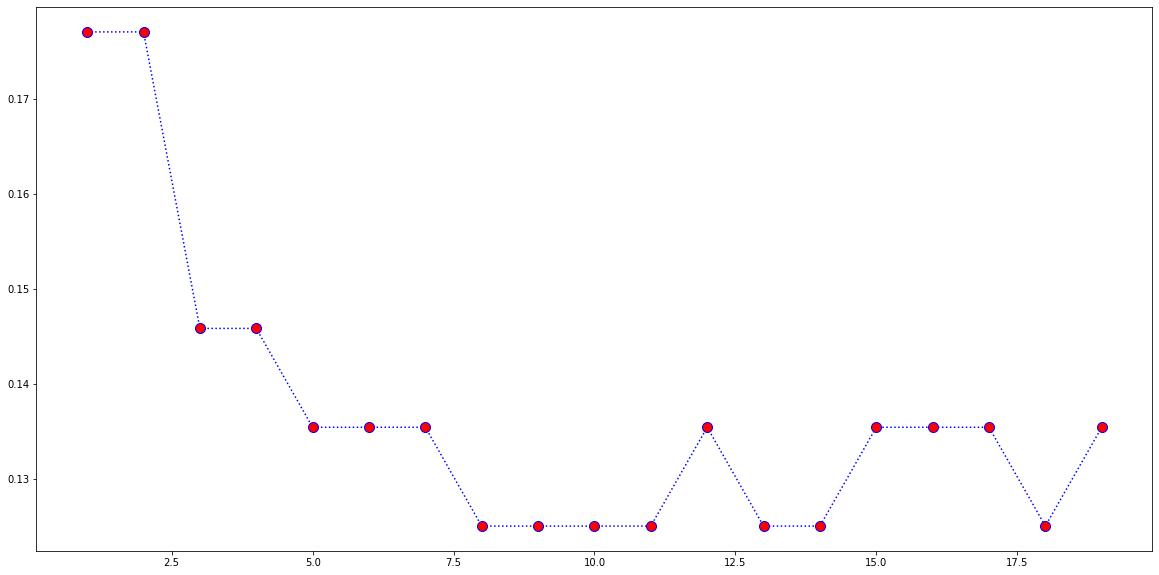

In [45]:
err = [] # Array to save all error rates

for i in range(1,20): # Loop to try all error rates from 1 to 40
    rfe = RandomForestClassifier(n_estimators=i*10,random_state=42) # Create rfc with number of estimators with value i*10
    rfe.fit(X_train,y_train) # Fit the model
    errpred = rfe.predict(X_test) # Predict the value
    err.append(np.mean(errpred != y_test)) #Add the value to the array
    
    
# Plotting the value of estimators error rate using the method we created above to make it easier to choose an estimator value
plt.figure(figsize=(20,10)) # Size of the figure
plt.plot(range(1,20),err,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=10)#plotting the values
plt.title = 'Number of estimators VS Error Rates' #title
plt.xlabel = 'Estimators' #X label
plt.ylabel= 'Error Rate' # Y label
plt.show()

### Training the model 

In [46]:
rfc = RandomForestClassifier(n_estimators=80,max_features='auto', max_depth=9,min_samples_leaf=1,
                             min_samples_split=2,bootstrap=True, random_state = 42)
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)

Random Forest Classifier

              precision    recall  f1-score   support

           H       0.86      0.82      0.84        22
           L       0.89      0.96      0.93        26
           M       0.89      0.88      0.88        48

    accuracy                           0.89        96
   macro avg       0.88      0.88      0.88        96
weighted avg       0.89      0.89      0.88        96



Confusion matrix


<AxesSubplot:>

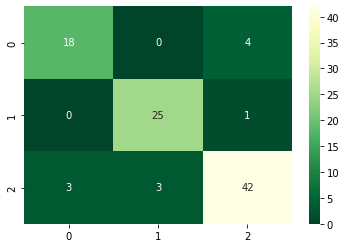

In [47]:
print('Random Forest Classifier' + '\n')
print(classification_report(y_test,rfcpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,rfcpred),cmap='YlGn_r',annot=True,fmt='g')

# Support Vector Classifier

In [48]:
svc = SVC(C=100,random_state=42,gamma=1)
svc.fit(X_train,y_train)
svcpred = svc.predict(X_test)

Support Vector Classifier

              precision    recall  f1-score   support

           H       0.80      0.73      0.76        22
           L       0.91      0.81      0.86        26
           M       0.79      0.88      0.83        48

    accuracy                           0.82        96
   macro avg       0.84      0.80      0.82        96
weighted avg       0.83      0.82      0.82        96



Confusion matrix


<AxesSubplot:>

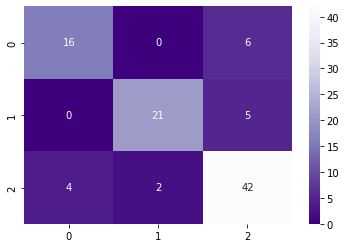

In [49]:
print('Support Vector Classifier' + '\n')
print(classification_report(y_test,svcpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,svcpred),cmap='Purples_r',annot=True,fmt='g')

# Desicion Tree Classifier

In [50]:
dt = DecisionTreeClassifier(max_depth=7, min_samples_split=4, min_samples_leaf=1, random_state=1)
dt.fit(X_train,y_train)
dtpred = dt.predict(X_test)

Desicion Tree Classifier

              precision    recall  f1-score   support

           H       0.75      0.82      0.78        22
           L       0.87      0.77      0.82        26
           M       0.80      0.81      0.80        48

    accuracy                           0.80        96
   macro avg       0.81      0.80      0.80        96
weighted avg       0.81      0.80      0.80        96



Confusion matrix


<AxesSubplot:>

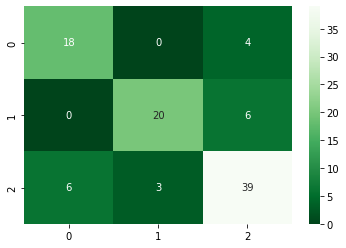

In [51]:
print('Desicion Tree Classifier' + '\n')
print(classification_report(y_test,dtpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,dtpred),cmap='Greens_r',annot=True,fmt='g')

# KNN classifier

### Choosing K value

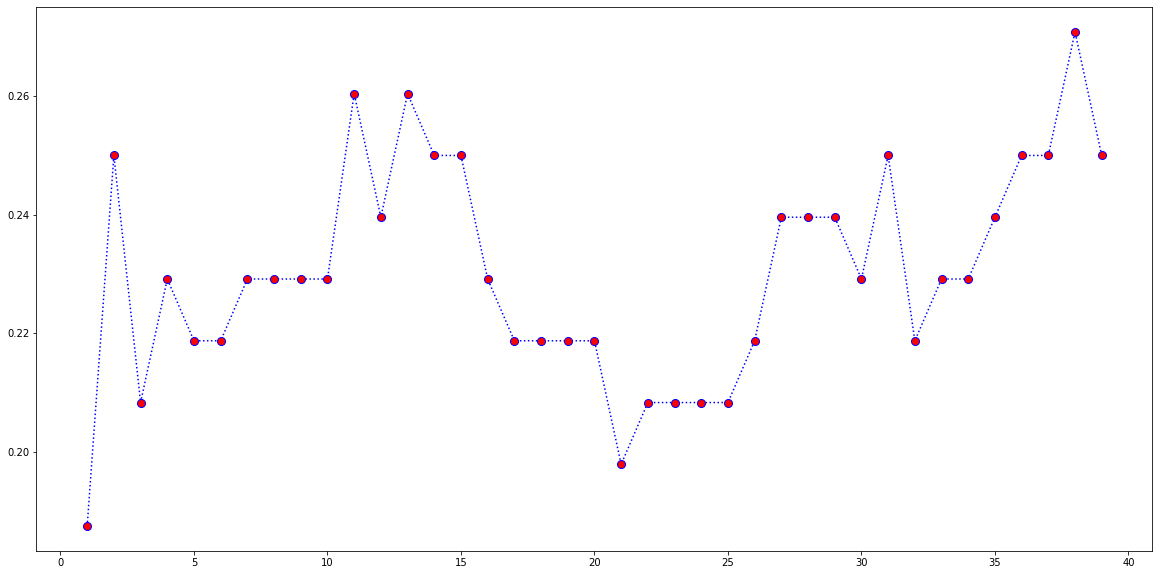

In [52]:
err_rate = [] # Array to save all error rates

for i in range(1,40): # loop to try all error rates from 1 to 40
    knn = KNeighborsClassifier(n_neighbors=i) # create a knn object with number of neighbours with value i
    knn.fit(X_train,y_train) # fit the model
    pred_i = knn.predict(X_test) # predict the value
    err_rate.append(np.mean(pred_i != y_test)) #add the value to the array
    
    # Plotting the value of k error rate using the method we created above to make it easier to choose a k value
plt.figure(figsize=(20,10)) # size of the figure
plt.plot(range(1,40),err_rate,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=8)#plotting the values
plt.title = 'K Values VS Error Rates' #title
plt.xlabel = 'K Value' #x label
plt.ylabel= 'Error Rate' # y label
plt.show()

### Training the model

In [53]:
# We didn't choose 1 as it's so sensetive to just rely on 1 neighbor
knn = KNeighborsClassifier(n_neighbors=21,p=10)
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)

K Nearest Neighbours

              precision    recall  f1-score   support

           H       0.77      0.77      0.77        22
           L       0.78      0.96      0.86        26
           M       0.86      0.75      0.80        48

    accuracy                           0.81        96
   macro avg       0.80      0.83      0.81        96
weighted avg       0.82      0.81      0.81        96



Confusion matrix


<AxesSubplot:>

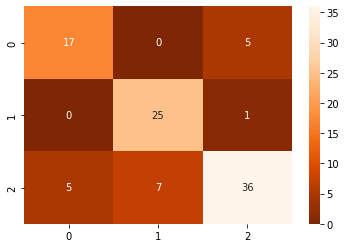

In [54]:
print('K Nearest Neighbours' + '\n')
print(classification_report(y_test,knnpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,knnpred),cmap='Oranges_r',annot=True,fmt='g')

# Logistic Regression 

In [55]:
Lr = LogisticRegression(C=1,max_iter=30,multi_class='auto',random_state=1)
Lr.fit(X_train,y_train)
Lrpred = Lr.predict(X_test)

Logistic Regression

              precision    recall  f1-score   support

           H       0.76      0.73      0.74        22
           L       0.81      0.96      0.88        26
           M       0.84      0.77      0.80        48

    accuracy                           0.81        96
   macro avg       0.80      0.82      0.81        96
weighted avg       0.81      0.81      0.81        96



Confusion matrix


<AxesSubplot:>

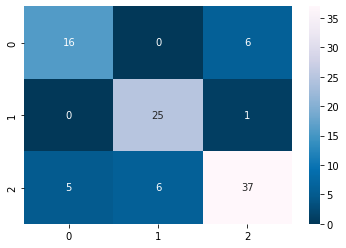

In [56]:
print('Logistic Regression' + '\n')
print(classification_report(y_test,Lrpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,Lrpred),cmap='PuBu_r',annot=True,fmt='g')

# Features importance

<AxesSubplot:>

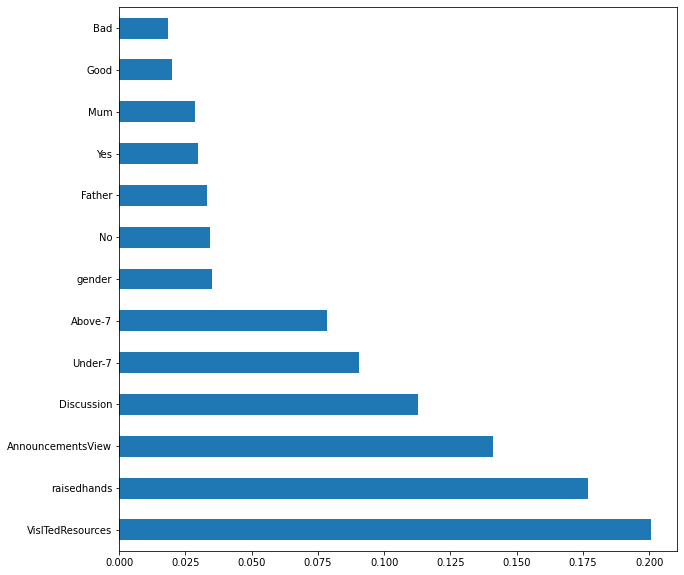

In [57]:
# Show which features has the most effect on our results so we can modify and tune our features
# I used Random Forest Classifier to determine the feature importances

plt.figure(figsize=(10,10))
importance = pd.Series(rfc.feature_importances_,index=Features.columns)
importance.nlargest(15).plot(kind='barh')

# Summary

### Here is a summary of best accuracy I could get from each model

#### Random Forest Classifier 89%
#### Support Vector Classifier 84%
#### Desicion Tree Classifier 82%
#### Logistic Regression 81%
#### KNN 81%